In [1]:
import pandas as pd
import os
from scipy.interpolate import make_interp_spline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 'contingency_tables.txt',
 'css_graph.gpickle',
 'PapersAbs.txt',
 'PapersCCS.txt',
 'Papers_AbsTokens.txt',
 'paper_subset',
 'README.md',
 'Week 4 - Networks I.ipynb',
 'Week 5 - full_css_network.png',
 'Week 5 - full_css_network_colored.png',
 'Week 5 - lcc_network.png',
 'Week 5 - Networks II.ipynb',
 'Week6.ipynb',
 'Week7-Copy1.ipynb',
 'Week7-Copy2.ipynb',
 'Week7.ipynb']

In [3]:
df_papers = pd.read_csv('PapersAbs.txt', index_col = 0)
df_papers

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields,Abstract
1,b30d4b44131698820ed05bcf7fb62c8fc6201672,Developing recommendations for designing smart...,2019,1.0,NaN,"['Computer Science', 'Sociology']",['1788563'],['Computer Science'],Cultural heritage carries the historical value...
2,9d59892c5657098bd3825116af8fad8d8ee943ff,Group Fairness for Indivisible Goods Allocation,2019,4.0,NaN,"['Economics', 'Computer Science']","['1749906', '4006636']","['Economics', 'Computer Science']",We consider the problem of fairly dividing a c...
3,867cc74781225da4e08a77fc35037ba77911e455,Hindsight Credit Assignment,2019,37.0,NaN,"['Economics', 'Computer Science']","['37666967', '144368601', '2605877', '3134710']","['Computer Science', 'Computer Science', 'Comp...",We consider the problem of efficient credit as...
4,37a0f28f6aa41028e64d0440001ff525d67c1305,The Constrained Round Robin Algorithm for Fair...,2019,9.0,NaN,"['Economics', 'Computer Science']","['144433798', '143999398']","['Economics', 'Computer Science']",We consider a multi-agent resource allocation ...
5,894b376090e1e843c79211603814ccbcab09f632,Interpretable Almost Matching Exactly With Ins...,2019,5.0,NaN,"['Economics', 'Computer Science']","['31938009', '48395540', '6974508']","['Computer Science', 'Computer Science', 'Comp...",Uncertainty in the estimation of the causal ef...
...,...,...,...,...,...,...,...,...,...
1444,3cbdec1b14b23320f175ac0f4936871d96fa9f07,The Keyword Explorer Suite: A Toolkit for Unde...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']",['40289577'],['Computer Science'],We have developed a set of Python applications...
1445,12e93d2094d51acedb43727dacfe9da355f5d10f,Using citation networks to evaluate the impact...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']","['3161628', '143975462']","['Computer Science', 'Computer Science']",","
1446,6348ea334196587c419b0cfc6b6bae11679b02eb,Cryptocurrency co-investment network: token re...,2023,0.0,NaN,['Economics'],['2818774'],['Computer Science'],.
1447,08a51de6f966f298baf711b80b00fc5701aa663c,#EndSARS Protest: Discourse and Mobilisation o...,2023,0.0,NaN,['Political Science'],['52143529'],['Computer Science'],"Using the @NGRPresident Twitter handle, the Go..."


In [4]:
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:

abstracts_list = df_papers['Abstract'].tolist()

In [ ]:
#abstracts_list

In [6]:
tokens_list = []

for x in abstracts_list:
    try:
        tokens_list.append(word_tokenize(x))
    except:
        tokens_list.append(None)



In [7]:
len(tokens_list)

1448

In [8]:
def clean_tokens(x):
    sw_nltk = stopwords.words('english')
    punc = list(string.punctuation)
    #is_integer = [lambda s: s.isdigit() or (s[0] == '-' and s[1:].isdigit())]
    urls = [word for word in x if re.search(r'(?:http://)?\w+\.\S*[^.\s]',word)]
    out = [sw_nltk + punc + urls + ['https']]
    out = [item for sublist in out for item in sublist]
    try:
        clw = [word.lower() for word in x]
        cl = [word for word in clw if word not in out]
        cli =  [word for word in cl if not any(letter.isdigit() for letter in word)]
        
    except:
        pass
    #cli = filter(is_integer,cl)
    return cli

In [9]:
clean_tokens_list = []
for x in tokens_list:
    try:
        clean_tokens_list.append(clean_tokens(x))
    except:
        clean_tokens_list.append(None)




In [10]:
df_papers["Tokens Abstract"] = clean_tokens_list

In [11]:
df_papers

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields,Abstract,Tokens Abstract
1,b30d4b44131698820ed05bcf7fb62c8fc6201672,Developing recommendations for designing smart...,2019,1.0,NaN,"['Computer Science', 'Sociology']",['1788563'],['Computer Science'],Cultural heritage carries the historical value...,"[cultural, heritage, carries, historical, valu..."
2,9d59892c5657098bd3825116af8fad8d8ee943ff,Group Fairness for Indivisible Goods Allocation,2019,4.0,NaN,"['Economics', 'Computer Science']","['1749906', '4006636']","['Economics', 'Computer Science']",We consider the problem of fairly dividing a c...,"[consider, problem, fairly, dividing, collecti..."
3,867cc74781225da4e08a77fc35037ba77911e455,Hindsight Credit Assignment,2019,37.0,NaN,"['Economics', 'Computer Science']","['37666967', '144368601', '2605877', '3134710']","['Computer Science', 'Computer Science', 'Comp...",We consider the problem of efficient credit as...,"[consider, problem, efficient, credit, assignm..."
4,37a0f28f6aa41028e64d0440001ff525d67c1305,The Constrained Round Robin Algorithm for Fair...,2019,9.0,NaN,"['Economics', 'Computer Science']","['144433798', '143999398']","['Economics', 'Computer Science']",We consider a multi-agent resource allocation ...,"[consider, multi-agent, resource, allocation, ..."
5,894b376090e1e843c79211603814ccbcab09f632,Interpretable Almost Matching Exactly With Ins...,2019,5.0,NaN,"['Economics', 'Computer Science']","['31938009', '48395540', '6974508']","['Computer Science', 'Computer Science', 'Comp...",Uncertainty in the estimation of the causal ef...,"[uncertainty, estimation, causal, effect, obse..."
...,...,...,...,...,...,...,...,...,...,...
1444,3cbdec1b14b23320f175ac0f4936871d96fa9f07,The Keyword Explorer Suite: A Toolkit for Unde...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']",['40289577'],['Computer Science'],We have developed a set of Python applications...,"[developed, set, python, applications, use, la..."
1445,12e93d2094d51acedb43727dacfe9da355f5d10f,Using citation networks to evaluate the impact...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']","['3161628', '143975462']","['Computer Science', 'Computer Science']",",",[]
1446,6348ea334196587c419b0cfc6b6bae11679b02eb,Cryptocurrency co-investment network: token re...,2023,0.0,NaN,['Economics'],['2818774'],['Computer Science'],.,[]
1447,08a51de6f966f298baf711b80b00fc5701aa663c,#EndSARS Protest: Discourse and Mobilisation o...,2023,0.0,NaN,['Political Science'],['52143529'],['Computer Science'],"Using the @NGRPresident Twitter handle, the Go...","[using, ngrpresident, twitter, handle, governm..."


In [12]:
df_papers = pd.read_csv('Papers_AbsTokens.txt')

In [13]:
df_papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1448 non-null   int64  
 1   paperId          1448 non-null   object 
 2   title            1448 non-null   object 
 3   year             1448 non-null   int64  
 4   citationCount    1448 non-null   float64
 5   externalIds.DOI  0 non-null      float64
 6   keywords         1448 non-null   object 
 7   authorIds        1448 non-null   object 
 8   author_fields    1448 non-null   object 
 9   Abstract         1339 non-null   object 
 10  Tokens Abstract  1339 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 124.6+ KB


In [14]:
tokens_words = [x for x in clean_tokens_list if str(x) != 'None']
concat = [item for sublist in tokens_words for item in sublist]
tokens_concat =  [word for word in concat if word.isalpha()]


In [15]:
def frequency(tokens, unique, freq):
    #uniqueWords = []
    for i in tokens:
        if not i in unique:
            unique.append(i)
    
    
    #tokensFrequency = {}
    for i in unique:
        freq[i] = sum(1 for x in tokens if i == x)
        
    sorted_tokens = sorted(freq.items(), key=lambda x:x[1], reverse=True)
    sorted_dict = dict(sorted_tokens)
    
    return unique, freq, sorted_dict

In [16]:
uniqueWords = []
tokensFrequency = {}
sorted_dict = {}

uniqueWords, tokensFrquency, sorted_dict = frequency(tokens_concat, uniqueWords, tokensFrequency)

print(f'Number of unique words: {len(uniqueWords)}')

Number of unique words: 12311


In [17]:
def smoothify(yInput):
    x = np.array(range(0, depth))
    y = np.array(yInput)
    # define x as 600 equally spaced values between the min and max of original x
    x_smooth = np.linspace(x.min(), x.max(), 600) 
    # define spline with degree k=3, which determines the amount of wiggle
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    # Return the x and y axis
    return x_smooth, y_smooth

In [18]:
def zipfGraph(sorted_dict, depth, texts):
    
    #plot zipfs curve
    
    figure(figsize=(12,10), dpi=80)
    ziffianCurveValues = [100/i for i in range(1, depth+1)]
    x, y = smoothify(ziffianCurveValues)
    plt.plot(x, y, label='Ziffian Curve', ls=':', color='grey')
    
    #plot tokens of text(s)
    
    
    if len(texts) == 1:
        sorted_list = list(sorted_dict.keys())
        words_plot = sorted_list[:depth]  
        sorted_values =  list(sorted_dict.values())
    
    
        maxValue = sorted_values[0]
        yAxis = [round(value / maxValue * 100) for value in sorted_values[:depth]]
        x, y = smoothify(yAxis)
        plt.plot(x, y, label=f' Tokens {texts[0]}', lw=1, alpha=0.5)
        plt.title('Top 50 Tokens')
        plt.xticks(range(0, depth), words_plot)
        plt.xticks(rotation='vertical')
        plt.legend()
        
    else:
        xAxis = [str(number) for number in range(1, depth+1)]
        #sorted_values =  list(sorted_dict[i].values())
        count = 0
        for i in sorted_dict:
            sorted_values =  list(sorted_dict[i].values())
            maxValue = list(sorted_dict[i].values())[0]
            yAxis = [round(value / maxValue * 100) for value in sorted_values[:depth]]
            x, y = smoothify(yAxis)
            plt.plot(x, y, label=f' Tokens {texts[count]}', lw=1, alpha=0.5)
            count +=1
            
            
        plt.title('Top 50 Tokens')
        plt.xticks(range(0, depth), xAxis)
        plt.legend()
        
        
    #plt.savefig('wordamounts.png', dpi=300)
    plt.show()
    

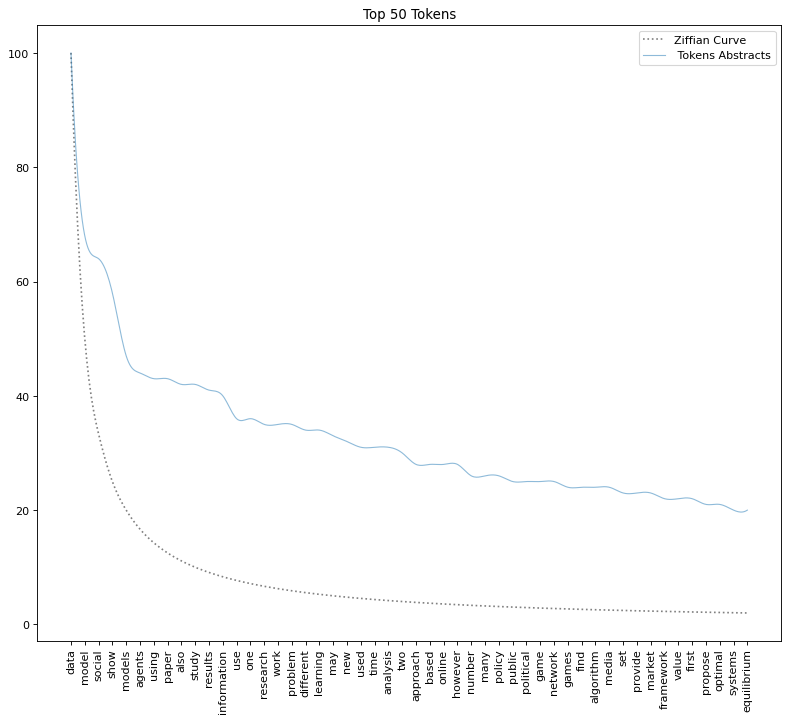

In [19]:
depth = 50
texts = ['Abstracts']
zipfGraph(sorted_dict, depth,texts)

In [20]:
import random
import string

def random_string(n):
    count = 0
    s = ''
    while count < n:
        s += random.choice('jdal' + ' ')
        count += 1
    return s

n = 7000

s = random_string(n)
randt = [word_tokenize(s)]

randt = [item for sublist in randt for item in sublist]

len(randt)



1123

In [21]:
uniqueWords2 = []
tokensFrequency2 = {}
sorted_dict2 = {}

uniqueWords2, tokensFrquency2, sorted_dict2 = frequency(randt, uniqueWords2, tokensFrequency2)

print(f'Number of unique words: {len(uniqueWords2)}')

Number of unique words: 624


In [22]:
texts = ['Abstracts', 'Random']
tokens = [sorted_dict, sorted_dict2]

texts_dict = dict(zip(texts, tokens))

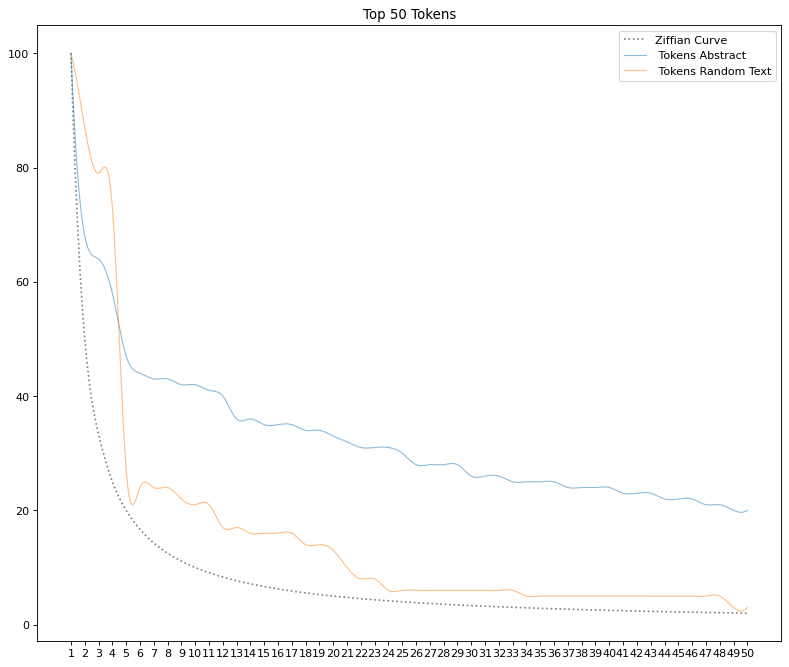

In [23]:
depth = 50
texts = ['Abstract', 'Random Text']
zipfGraph(texts_dict, depth,texts)

In [24]:
from nltk.collocations import *


In [25]:

colloc_lists = []
#bestc_list=[]
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens_concat)
#bestc_list.append(finder.nbest(bigram_measures.pmi, 10))
scored = finder.score_ngrams(bigram_measures.raw_freq)
#scored = finder.above_score(bigram_measures.raw_freq, 0.1)
colloc_lists.append(scored)
#clist.append(scored[])
#colloc_lists

In [26]:
colloc_list1 = [item for sublist in colloc_lists for item in sublist]


In [27]:
c_list = []
for i in colloc_list1:
    c_list.append(i[0]) 

In [100]:
len(c_list)

94698

In [28]:
c_list

[('social', 'media'),
 ('machine', 'learning'),
 ('decision', 'making'),
 ('reinforcement', 'learning'),
 ('results', 'show'),
 ('game', 'theory'),
 ('nash', 'equilibrium'),
 ('shapley', 'value'),
 ('united', 'states'),
 ('fake', 'news'),
 ('voting', 'rules'),
 ('et', 'al'),
 ('causal', 'inference'),
 ('artificial', 'intelligence'),
 ('social', 'welfare'),
 ('treatment', 'effects'),
 ('conclude', 'conclude'),
 ('learning', 'models'),
 ('causal', 'effects'),
 ('nash', 'equilibria'),
 ('observational', 'data'),
 ('resource', 'allocation'),
 ('time', 'series'),
 ('allows', 'us'),
 ('open', 'access'),
 ('public', 'health'),
 ('real', 'world'),
 ('recent', 'years'),
 ('results', 'suggest'),
 ('social', 'choice'),
 ('data', 'sources'),
 ('weak', 'ties'),
 ('climate', 'change'),
 ('cultural', 'heritage'),
 ('data', 'code'),
 ('mean', 'estimation'),
 ('paper', 'propose'),
 ('treatment', 'effect'),
 ('using', 'data'),
 ('also', 'show'),
 ('causal', 'effect'),
 ('media', 'platforms'),
 ('neural'

In [29]:
len(c_list)

94698

In [30]:
'''
ct_list_full = []
count=0
for x in c_list:

    nii=0
    nio=0
    noi=0
    noo=0
        
    col = x
        
    for i in colloc_list:
            
        if i == col:
            nii = colloc_list1[count][1]*132917
    
        elif i[0] == col[0]:
            nio+=1
            
        elif i[1] == col[1]:
            noi+=1
            
        else:
            noo+=1
        
    ct = [nii,nio,noi,noo]
    ct_list_full.append(ct)
        
    count+=1
    print(count/len(c_list))
    
'''  
        

'\nct_list_full = []\ncount=0\nfor x in c_list:\n\n    nii=0\n    nio=0\n    noi=0\n    noo=0\n        \n    col = x\n        \n    for i in colloc_list:\n            \n        if i == col:\n            nii = colloc_list1[count][1]*132917\n    \n        elif i[0] == col[0]:\n            nio+=1\n            \n        elif i[1] == col[1]:\n            noi+=1\n            \n        else:\n            noo+=1\n        \n    ct = [nii,nio,noi,noo]\n    ct_list_full.append(ct)\n        \n    count+=1\n    print(count/len(c_list))\n    \n'

In [31]:
'''
file = open('contingency_tables.txt','w')
for item in ct_list_full:
    file.write(str(item))
file.close()
'''

"\nfile = open('contingency_tables.txt','w')\nfor item in ct_list_full:\n    file.write(str(item))\nfile.close()\n"

In [32]:
my_file = open("contingency_tables.txt", "r")

In [33]:
ct =my_file.read()

In [107]:
data_into_list = ct.replace(']', '];').split(';')
my_file.close()

In [91]:
ct_list = []
for x in data_into_list:
    i = x.split(',')
    i = [n.replace('[', '') for n in i]
    i = [n.replace(']', '') for n in i]
    i = [n.replace(' ', '') for n in i]
    try:
        i = [int(float(n)) for n in i]
    except:
        pass
    ct_list.append(i)

In [94]:
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats.contingency import expected_freq

In [101]:
pvalue_full = []

for x in ct_list:
    try:
        obs = [[x[0], x[1]], [x[2], x[3]]]  
        obs_exp = expected_freq(obs)
        pvalue = chisquare(obs, obs_exp).pvalue[1]
        
        pvalue_full.append(pvalue)
        
    except:
        pass

In [102]:
len(pvalue_full)

94698

In [103]:
dct = {w: x for w, x in zip(c_list, pvalue_full)}


In [104]:
sorted_pv = sorted(dct.items(), key=lambda x:x[1])
        
spv_dict = dict(sorted_pv)


In [105]:
test_list=[]
for key, value in spv_dict.items():
    temp = [key,value]
    test_list.append(temp)

In [106]:
spv_list=[]

for i in test_list:
    if i[1]<0.001:
        spv_list.append(i)
        
spv_list

[[('machine', 'learning'), 4.0488043389451235e-18],
 [('social', 'media'), 1.4120748943222558e-14],
 [('reinforcement', 'learning'), 1.534687423950977e-12],
 [('united', 'states'), 3.0031529921678223e-10],
 [('nash', 'equilibrium'), 4.953618878655054e-10],
 [('shapley', 'value'), 8.185949585732012e-10],
 [('fake', 'news'), 2.0332307429521857e-09],
 [('artificial', 'intelligence'), 2.783916520892534e-08],
 [('decision', 'making'), 8.330046002537389e-08],
 [('et', 'al'), 1.4746961241794346e-06],
 [('nash', 'equilibria'), 2.121022119360534e-06],
 [('observational', 'data'), 2.3324527435767243e-06],
 [('voting', 'rules'), 5.324672602945756e-06],
 [('neural', 'networks'), 9.678147244961788e-06],
 [('imperfect', 'information'), 1.1185503795827928e-05],
 [('est', 'destinée'), 1.3071845366763017e-05],
 [('ouverte', 'pluridisciplinaire'), 1.3071845366763017e-05],
 [('établissements', 'enseignement'), 1.3071845366763017e-05],
 [('destinée', 'au'), 1.3074594709768557e-05],
 [('français', 'ou'), 1